In [20]:
import numpy as np
from matplotlib import pyplot as plt 
import ipywidgets as widgets
import tensorflow as tf
import cv2

plt.rcParams["font.size"] = 18

# 各定数変換
$$
k = \dfrac{2\pi}{\lambda} \\
f = \dfrac{c}{\lambda} \\
\omega = 2\pi f
$$

In [21]:
l = 633e-9
k = 2 * np.pi/l
c = 299792458
w = 2 * np.pi * c / l

# 楕円偏光
$$
\begin{pmatrix}
E_x \\
E_y \\
\end{pmatrix}
=
\begin{pmatrix}
A_x e^{j(wt-kz)} \\
A_y e^{j(wt-kz + \phi)} \\
\end{pmatrix}
$$

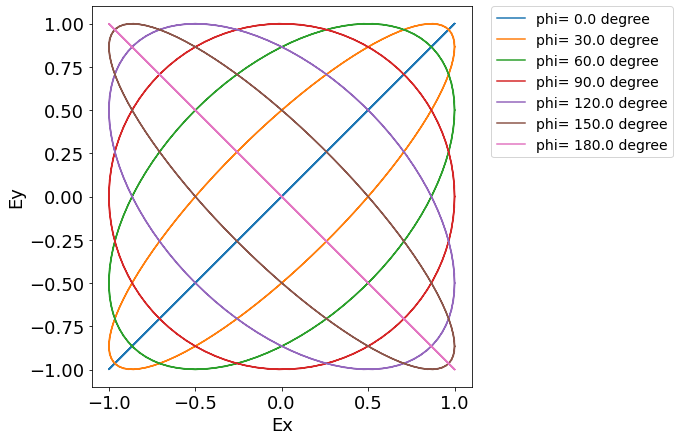

In [22]:
z = np.linspace(0, l * 2, 100)
t = 0
Ax = Ay = 1
phi =np.arange(0, np.pi+np.pi/6, np.pi/6)
ax = plt.figure(figsize=(9,7)).add_subplot()
for p in phi:
  Ex = Ax*np.exp(1j*(w*t-k*z))
  Ey = Ax*np.exp(1j*(w*t-k*z + p))
  # plot
  ax.plot(Ex.real, Ey.real, label='phi= ' + str(np.round(p * 180 / np.pi)) + " degree")
ax.set_xlabel("Ex")
ax.set_ylabel("Ey")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
ax.set_aspect('equal')
plt.show()

楕円偏光の別表記
$$
E_r=A_r e^{-j(wt-kr)} \\
E_l = A_l e^{j(wt-kr)}　\\
E = E_r+E_l \\
$$
逆回りの円偏光を足せば楕円偏光

In [23]:
i_vec = np.array([[1],
                  [0]])
j_vec = np.array([[0], 
                  [1]])

r_pol = 1/np.sqrt(2) * (i_vec + 1j*j_vec)
t = np.linspace(0, 3e-15, 300)

def change_phase(a, p):
  E1 = 1/np.sqrt(2) * np.exp(-1j*(w*t))
  E2 = a/np.sqrt(2) * np.exp(1j*(w*t-p))
  E = E1 + E2
  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot()
  ax.scatter(E1[0].imag, E1[0].real, color="b")
  ax.plot(E1.imag, E1.real, label=r'$E_R$',  color="b")
  ax.scatter(E2[0].imag, E2[0].real, color="orange")
  ax.plot(E2.imag, E2.real, label=r'$E_L$', color="orange")
  ax.scatter(E[0].imag, E[0].real, color="green")
  ax.plot(E.imag, E.real, label=r'$E_R + E_L$', color="green")
  ax.legend()
  ax.set_aspect('equal')
  ax.set_xlabel(r"$E_{im}$")
  ax.set_ylabel("$E_{re}$")

widgets.interact(change_phase, a=(0, 3, 0.1), p=(0, np.pi, np.pi/50))

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0), FloatSlider(value=1.5079644737231008, …

<function __main__.change_phase(a, p)>

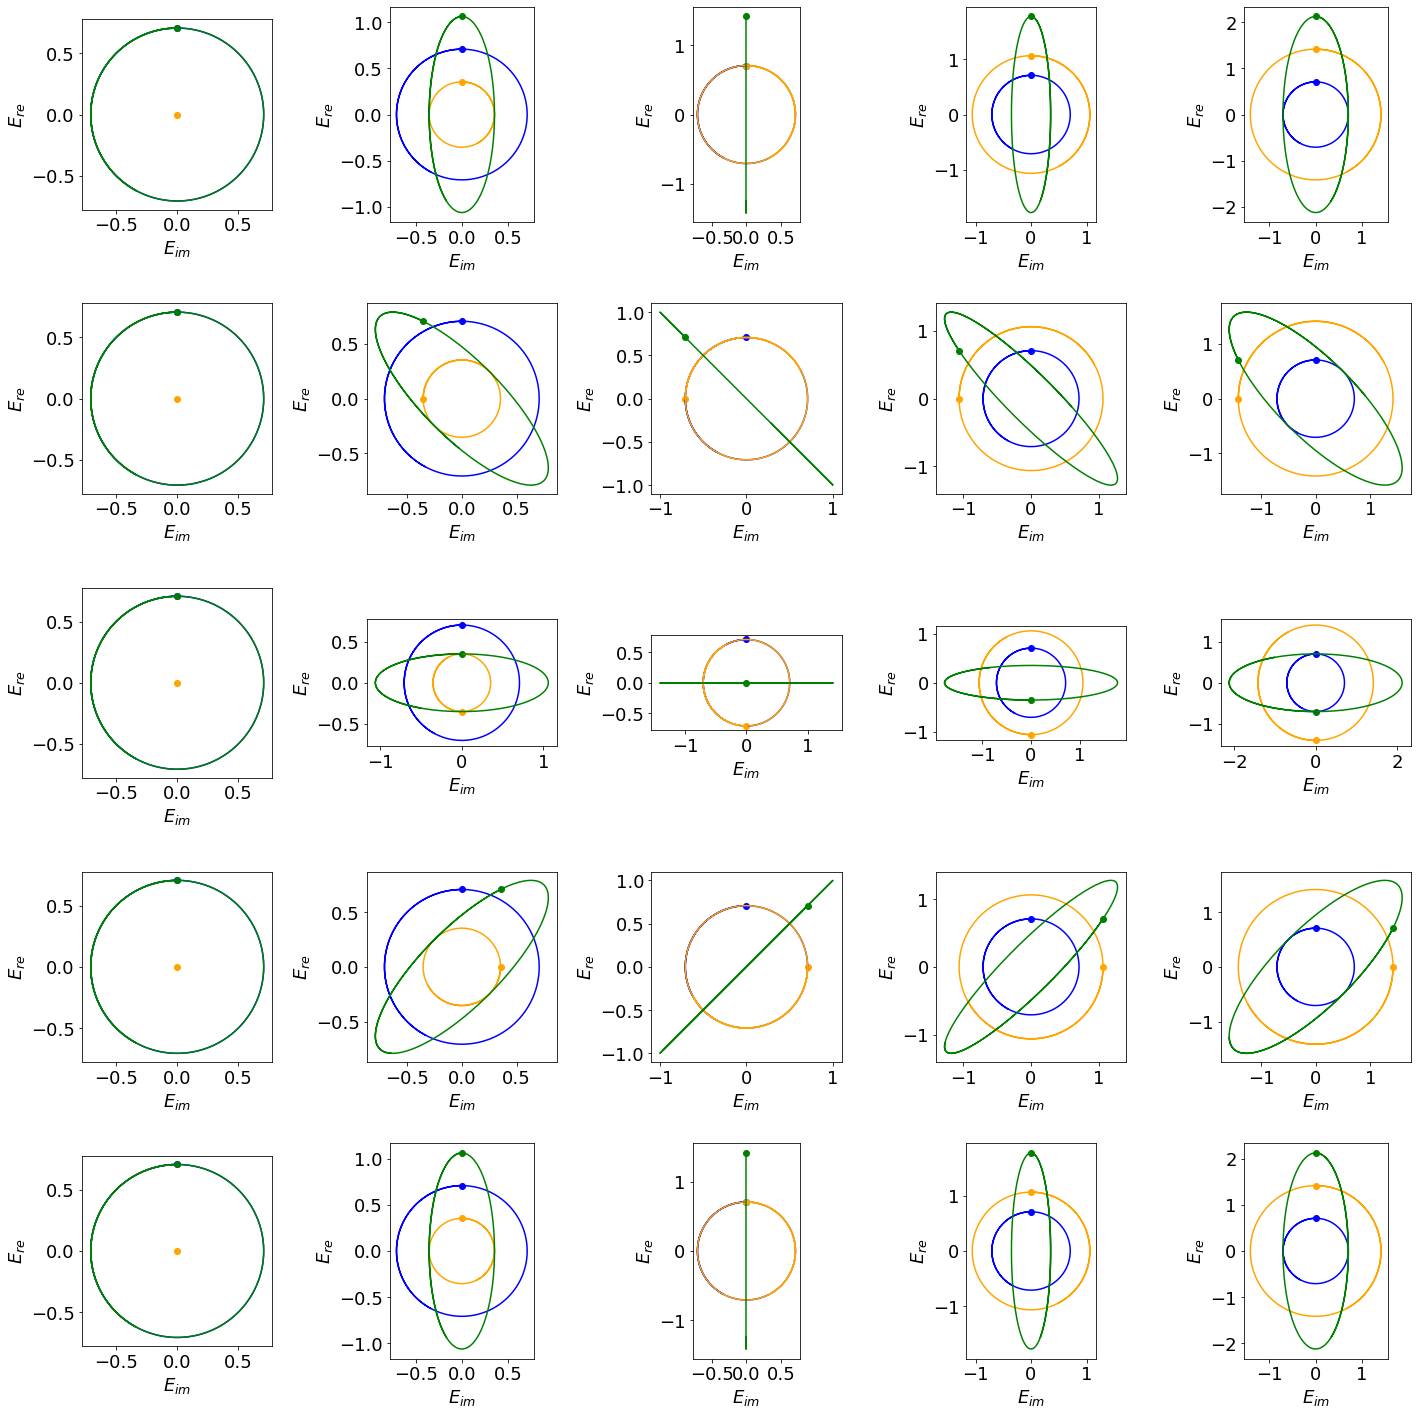

In [24]:
plot_num = 11
a = np.linspace(0, 2, 5)
p = np.linspace(0, 2*np.pi, 5)

fig, axes = plt.subplots(p.size, a.size, figsize=(20,20))

for row, axes_row in enumerate(axes):
  for col, ax in enumerate(axes_row):
    E1 = 1/np.sqrt(2) * np.exp(-1j*(w*t))
    E2 = a[col]/np.sqrt(2) * np.exp(1j*(w*t-p[row]))
    E = E1 + E2
    ax.scatter(E1[0].imag, E1[0].real, color="b")
    ax.plot(E1.imag, E1.real, label=r'$E_R$',  color="b")
    ax.scatter(E2[0].imag, E2[0].real, color="orange")
    ax.plot(E2.imag, E2.real, label=r'$E_L$', color="orange")
    ax.scatter(E[0].imag, E[0].real, color="green")
    ax.plot(E.imag, E.real, label=r'$E_R + E_L$', color="green")
    ax.set_aspect('equal')
    ax.set_xlabel(r"$E_{im}$")
    ax.set_ylabel("$E_{re}$")

fig.tight_layout()

円偏光だけで考えるならば
$$
E=e^{j(wt-kr)}
$$
で十分

In [25]:

i_vec = np.array([[1],
                  [0]])
j_vec = np.array([[0], 
                  [1]])

r_pol = 1/np.sqrt(2) * (i_vec + 1j*j_vec)
t = np.linspace(0, 3e-15, 300)

def change_phase(p):
  E1 = 1/np.sqrt(2) * np.exp(-1j*(w*t))
  E2 = 1.5/np.sqrt(2) * np.exp(-1j*(w*t-p))
  E = E1 + E2
  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot()
  ax.scatter(E1[0].imag, E1[0].real, color="b")
  ax.plot(E1.imag, E1.real, color="b", label=r'$E_1$')
  ax.scatter(E2[0].imag, E2[0].real, color="orange")
  ax.plot(E2.imag, E2.real, color="orange", label=r'$E_2$')
  ax.scatter(E[0].imag, E[0].real, color="green")
  ax.plot(E.imag, E.real, color="green", label=r'$E=E_1 + E_2$')
  ax.legend()
  ax.set_aspect('equal')
  ax.set_xlabel(r"$E_{im}$")
  ax.set_ylabel(r"$E_{re}$")

widgets.interact(change_phase, p=(0, np.pi, np.pi/50))


interactive(children=(FloatSlider(value=1.5079644737231008, description='p', max=3.141592653589793, step=0.062…

<function __main__.change_phase(p)>

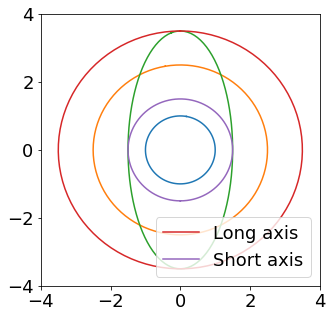

In [65]:
theta = 10 * np.pi/180
Ar = 1
Al = 2.5
x = np.linspace(0, 2*np.pi, 100)
rcp = Ar * np.exp(1j*(x+theta))
lcp = Al * np.exp(-1j*(x+theta))
eli = rcp + lcp
plt.figure(figsize=(5,5))
plt.plot(rcp.imag, rcp.real)
plt.plot(lcp.imag, lcp.real)
plt.plot(eli.imag, eli.real)
plt.plot((abs(rcp) + abs(lcp)) * np.sin(x), (abs(rcp)  + abs(lcp)) * np.cos(x), label="Long axis")
plt.plot((abs(rcp) - abs(lcp)) * np.sin(x), (abs(rcp)  - abs(lcp)) * np.cos(x), label="Short axis")
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.legend()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#レーリーゾンマーフェルト(Reyleigh-Sommerfeld)
回折公式
$$
h(x,y,z) = \dfrac{1}{2\pi} \dfrac{z}{r} \left( \dfrac{1}{r}-jk \right) \dfrac{exp(jkr)}{r}
$$

In [27]:
def reyleigh_sommerfeld(z):
  plt.figure(figsize=(5,8))
  plt.title("z = "+ str(z) + "nm")
  z = z*1e-9
  y = np.linspace(-10*l, l*10, 100000)
  r = np.sqrt(z**2 + y**2)
  h = 1/(2*np.pi) * z / r * (1/r - 1j*k) * np.exp(1j * k * r) / r
  plt.plot(h.real, y, label="real")
  plt.plot(h.imag, y, label="image")
  plt.plot(np.abs(h), y, label="Abs")
  plt.legend()

widgets.interact(reyleigh_sommerfeld, z=(0, 10000,1))

interactive(children=(IntSlider(value=5000, description='z', max=10000), Output()), _dom_classes=('widget-inte…

<function __main__.reyleigh_sommerfeld(z)>

#レーリーゾンマーフェルト(Reyleigh-Sommerfeld)回折による干渉
$$
h(x,y,z) = \dfrac{1}{2\pi} \dfrac{z}{r} \left( \dfrac{1}{r}-jk \right) \dfrac{exp(jkr)}{r}
$$
開口の幅が$d$
開口が$2N+1$個あり,$y=-Nd\cdots Nd$に存在しているとき、開口から放たれる光は一つの点光源であるとすると
$$
\sum^{2N+1}_{n=0} \left( \dfrac{1}{2\pi} \dfrac{z}{r} \left( \dfrac{1}{r}-jk \right) \dfrac{exp(jkr)}{r} \right) \\
= \dfrac{exp(jk)}{2\pi} \sum^{2N+1}_{n=0} \left(z \left( \dfrac{1}{r}-jk \right) \dfrac{exp(r)}{r^2} \right)
$$

In [28]:
def reyleigh_sommerfeld(x, y, z):
  r = np.sqrt(x**2 + y**2 + z**2)
  h = 1/(2*np.pi) * z / r * (1/r - 1j*k) * np.exp(1j * k * r) / r
  return h

均一な振幅の入力

Text(0, 0.5, 'y (cm)')

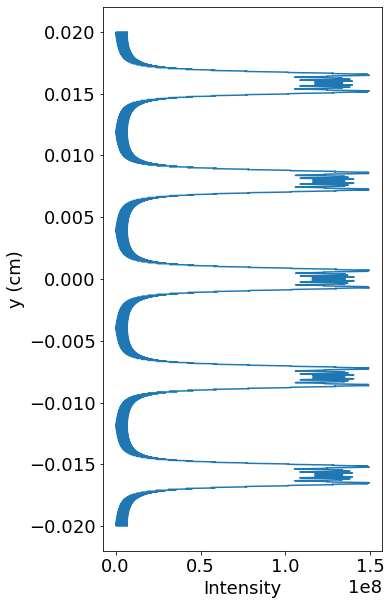

In [29]:
N = 50
M = 2*N+1
d = 20e-6
#sorce
sy = np.arange(-N*d, N*d + d/2, d)
y = np.arange(-20e-3, 20e-3, l/2)
y_each = np.ones((M,1)) * y - sy.reshape((-1,1)) # um
z = 25e-2 # cm
x = 0

I_each = reyleigh_sommerfeld(x, y_each, z)
I = np.sum(I_each, axis=0)

plt.figure(figsize=(5,10))
plt.plot(np.abs(I), y)
plt.xlabel("Intensity")
plt.ylabel("y (cm)")

入力の振幅に分布を持たせる

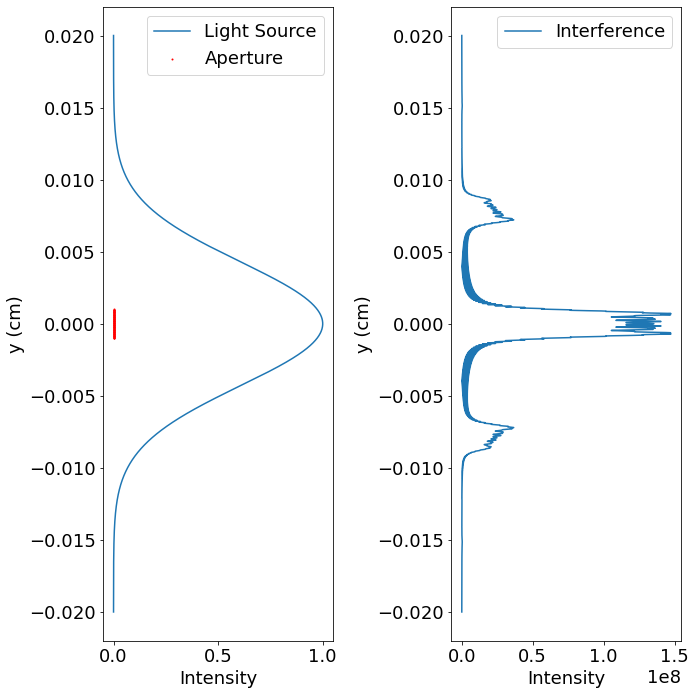

In [30]:
N = 50
M = 2*N+1
d = 20e-6
#sorce
sy = np.arange(-N*d, N*d + d/2, d)

y = np.arange(-20e-3, 20e-3, l)
y_each = np.ones((M,1)) * y - sy.reshape((-1,1)) # um
z = 25e-2 # cm
x = 0

expand_rad = 1.2e-3 # rad 広がり角
A = np.exp(-2*y**2/(10*0.8e-3 + 2 * z * np.tan(expand_rad))**2)
I_each = reyleigh_sommerfeld(x, y_each, z) * A
I = np.sum(I_each, axis=0)
fig, axes = plt.subplots(1, 2,figsize=(10,10))
axes[0].plot(A, y, label="Light Source")
axes[0].set_xlabel("Intensity")
axes[0].set_ylabel("y (cm)")
axes[0].scatter(np.zeros_like(sy), sy, s=1, label="Aperture", c="red")
axes[0].legend()

axes[1].plot(np.abs(I), y, label="Interference")
axes[1].set_xlabel("Intensity")
axes[1].set_ylabel("y (cm)")
axes[1].legend()
#axes[1].set_xlim((-1,100))
fig.tight_layout()

In [31]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

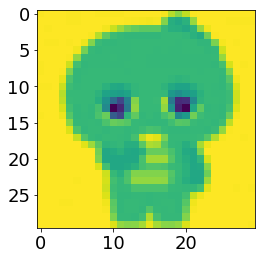

In [32]:
gatyapin = cv2.imread("data/gatyapin.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(gatyapin)

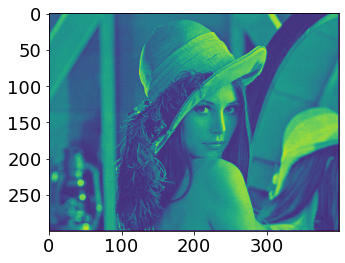

In [33]:
lena = cv2.imread("data/lena.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(lena)

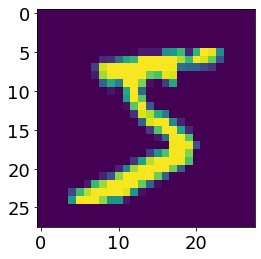

In [34]:
plt.imshow(x_train[0])

In [35]:
def free_space_propagation_with_reyleigh(src, pixsize, z):
  shape = src.shape
  amp = src.reshape((-1, 1))
  x1 = np.arange(0, shape[1], 1)
  y1 = np.arange(0, shape[0], 1)
  X1, Y1 = np.meshgrid(x1, y1)
  X1 = X1.reshape(1, -1)
  Y1 = Y1.reshape(1, -1)

  x2 = np.arange(0, shape[1] * 2, 0.5)
  y2 = np.arange(0, shape[0] * 2, 0.5)
  X2, Y2 = np.meshgrid(x2, y2)
  screen_shape = X2.shape
  X2 = X2.reshape(-1, 1)
  Y2 = Y2.reshape(-1, 1)

  dX = pixsize*(X1 - X2)
  dY = pixsize*(Y1 - Y2)
  R = np.sqrt(dX**2 + dY**2 + z**2)
  W = 1/(2*np.pi) * z / R * (1/R - 1j*k) * np.exp(1j * k * R)
  U = W @ amp
  return np.abs(U.reshape(screen_shape))

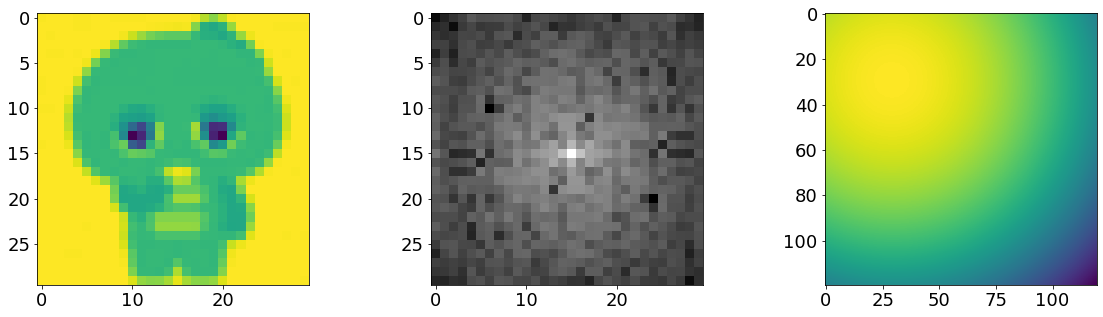

In [36]:
d = 0.5e-6
z = 25e-2
pattern = np.zeros((25, 25))
pattern[0::3, 0::3] = 1.0
pattern = gatyapin
fft_pattern = np.fft.fft2(pattern)
fft_pattern = np.fft.fftshift(fft_pattern)
fft_pattern = 20 * np.log(np.absolute(fft_pattern))

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(pattern)
axes[1].imshow(fft_pattern, cmap='gray')
axes[2].imshow(free_space_propagation_with_reyleigh(fft_pattern, d, z))

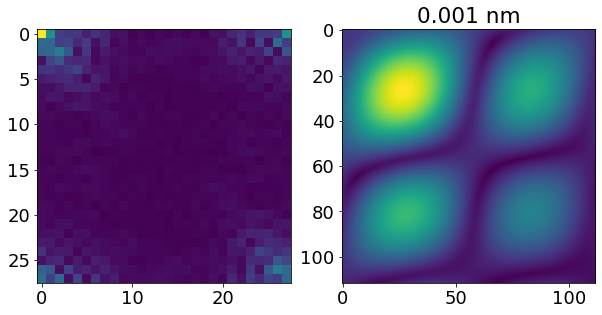

In [37]:
d = 1e-6
z = 1e-3

fft_imag = np.fft.fft2(x_train[1])
#fft_imag = np.fft.fftshift(fft_imag)

def func(z):
  fig, axes = plt.subplots(1, 2, figsize=(10,10))
  axes[0].imshow(np.abs(fft_imag))
  axes[1].imshow(free_space_propagation_with_reyleigh(np.abs(fft_imag), d, z))
  axes[1].set_title(str(z) + ' nm')

#widgets.interact(func, z=(0, 10000,10))
func(z)

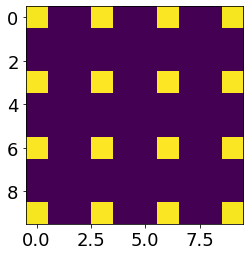

In [38]:
z = 1e-3
shape = (10,10)
x1 = np.arange(0, shape[1], 1)
y1 = np.arange(0, shape[0], 1)
X1, Y1 = np.meshgrid(x1, y1)
X1 = X1.reshape(1, -1)
Y1 = Y1.reshape(1, -1)

x2 = np.arange(0, shape[1] * 1, 1)
y2 = np.arange(0, shape[0] * 1, 1)
X2, Y2 = np.meshgrid(x2, y2)
screen_shape = X2.shape
X2 = X2.reshape(-1, 1)
Y2 = Y2.reshape(-1, 1)

dX = (X1 - X2) * 1.0e-6
dY = (Y1 - Y2) * 1.0e-6
R = np.sqrt(dX**2 + dY**2 + z**2)
W = 1/(2*np.pi) * z / R * (1/R - 1j*k) * np.exp(1j * k * R)
W = W.reshape(-1, 10, 10)
R = R.reshape(-1, 10, 10)

pattern = np.zeros((10, 10))
pattern[0::3, 0::3] = 1.0
out = np.einsum('ijk,jk->jk', W, pattern)
out.shape
plt.imshow(np.abs(out))